# Diabetes Dataset

## Dataset Overview

- The dataset is from the National Institute of Diabetes and Digestive and Kidney Diseases.
- The primary objective is to predict whether a patient has diabetes based on certain diagnostic measurements.
- A key characteristic of this dataset is that all patients are females of at least 21 years of age and of Pima Indian heritage.
- Data includes
  - several medical predictor independent variables
  - one target dependant variable

## Features

### The dataset includes the following attributes

| Feature                     | Description                               |
| --------------------------- | ----------------------------------------- |
| 1. Pregnancies              | To express the Number of pregnancies      |
| 2. Glucose                  | To express the Glucose level in blood     |
| 3. BloodPressure            | To express the Blood pressure measurement |
| 4. SkinThickness            | To express the thickness of the skin      |
| 5. Insulin                  | To express the Insulin level in blood     |
| 6. BMI                      | To express the Body mass index            |
| 7. DiabetesPedigreeFunction | To express the Diabetes percentage        |
| 8. Age                      | To express the age                        |
| 9. Outcome                  | To express the final result 1 is Yes and 0 is No |

# EDA of the Dataset

## Initial setup

In [2]:
# Import essential libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Fetch the dataset
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Understanding the dataset

In [10]:
df.columns
# List of feature names

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
print("Number of records: ", df.shape[0])
print("Number of features: ", df.shape[1])

Number of records:  768
Number of features:  9


In [11]:
df.info()
# Observe the accuracy of data types and count of null values for each feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


> Observations:
1. All features have valid data types
2. There are no missing values for any of the features

In [ ]:
df.isnull().sum().any()

np.False_

> Observations
1. This reconfirms there are no null values in any feature

In [ ]:
df.duplicated().sum()

np.int64(0)

> Observations
3. There are no duplicate records

### Summarize basic statistics of all features

In [12]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


> Observations:
1. Mean value of Outcome is 0.348 indicate approximately 35% of recorded people have diabetes.
2. The mean glucose level is 120.89, which falls within a range often associated with pre-diabetes.
3. The mean BMI is 31.99, which is in the obese range for adults (BMI > 30).
4. The mean age is approximately 33.2 years, with a range from 21 to 81. The median age is 29, which indicates that the dataset is slightly right-skewed towards younger individuals, but includes a wide range of ages.

## Analysing the dataset

### Uni-Variate Analysis

#### Analysing each predictive feature individually

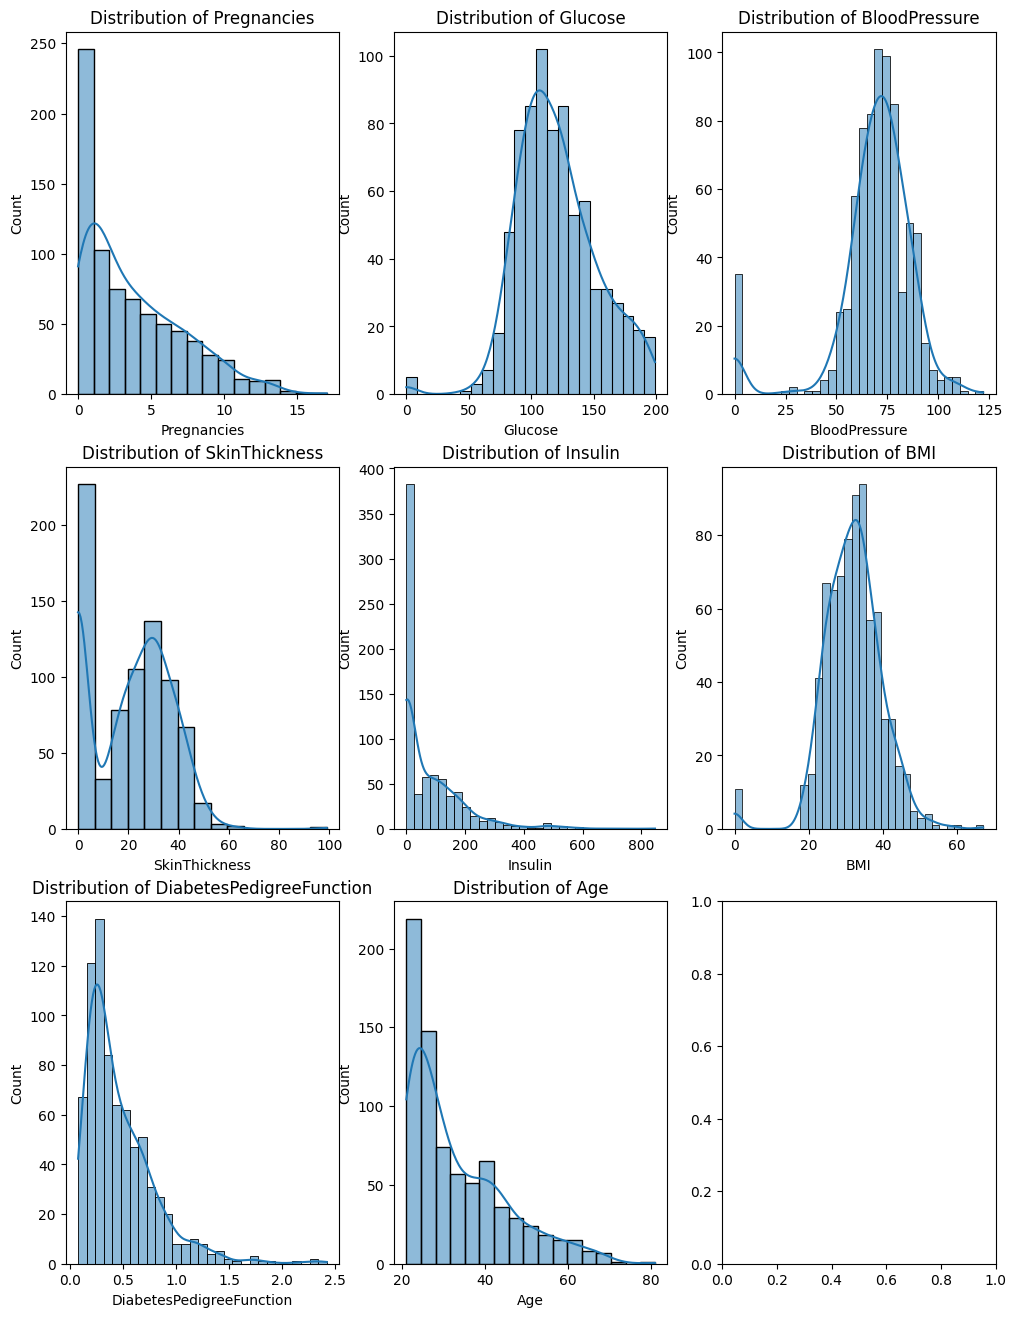

In [ ]:
# Plot a histogram for each feature as subplots except the last feature of 'Outcome'

fig, axes = plt.subplots(3, 3, figsize=(12, 16))
axes = axes.flatten()

for i, feature in enumerate(df.columns[:-1]):
    sns.histplot(df[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)

##### Observations from Univariate analysis
1. Pregnancies
   - The data is right skewed.
   - Most of the patients have fewer children.
2. Glucose
   - An approximate normal distribution.
   - Most patients have glucose levels in a range expected for a population being tested for diabetes.
   - Has outliers with impossible 0 value that need imputation.
3. BloodPreasure
   - An approximate normal distribution.
   - Most patients have a diastolic blood pressure in the normal to pre-hypertensive range.
   - Has outliers with impossible 0 value that need imputation.
4. SkinThickness
   - An approximate normal distribution.
   - For most patients skin thickness (a proxy for body fat) varies.
   - Has too many outliers with impossible 0 value that need imputation.
5. Insulin
   - A heavily right skewed distribution.
   - For most patients, the vast range indicates a high degree of variability in insulin response.
   - Has too many outliers with impossible 0 value that need imputation.
6. BMI
   - An approximately normal distribution.
   - The average patient in this dataset falls into the obese category (BMI ≥ 30), which is a major risk factor for diabetes
   - Has outliers with impossible 0 value that need imputation.
7. DiabetesPedigreeFunction
   - A right-skewed distribution with a long right tail.
   - This function estimates diabetes likelihood based on family history. The skew shows that most individuals have a low-to-moderate genetic risk score, while a smaller group has a much higher calculated genetic predisposition.
8. Age
   - A right-skewed distribution.
   - The patient population is predominantly young, with most individuals being in their 20s and early 30s. The dataset contains progressively fewer older patients.

#### Data Removal

Removing records with maximum invalid data

In [13]:
# For each feature get the count of records having 0 values

for feature in df.columns[:-1]:
    print(f'{feature}: {df[df[feature] == 0][feature].count()} ({df[df[feature] == 0][feature].count()/df.shape[0]*100:.1f}%)')

Pregnancies: 111 (14.5%)
Glucose: 5 (0.7%)
BloodPressure: 35 (4.6%)
SkinThickness: 227 (29.6%)
Insulin: 374 (48.7%)
BMI: 11 (1.4%)
DiabetesPedigreeFunction: 0 (0.0%)
Age: 0 (0.0%)


In [14]:
# Get the count of records for which Pregnancies, BloodPressure, SkinThickness and Insulin have value 0

df[(df['Pregnancies'] == 0) & (df['BloodPressure'] == 0) & (df['SkinThickness'] == 0) & (df['Insulin'] == 0)].shape[0]

10

In [17]:
# Removing those records from the dataset

df = df[~((df['Pregnancies'] == 0) & (df['BloodPressure'] == 0) & (df['SkinThickness'] == 0) & (df['Insulin'] == 0))]

# Count after removal
df[(df['Pregnancies'] == 0) & (df['BloodPressure'] == 0) & (df['SkinThickness'] == 0) & (df['Insulin'] == 0)].shape[0]

0

In [16]:
# Get the count of records for which Pregnancies, SkinThickness and Insulin have value 0 except BloodPressure

df[(df['Pregnancies'] == 0) & (df['BloodPressure'] != 0) & (df['SkinThickness'] == 0) & (df['Insulin'] == 0)].shape[0]

22

In [18]:
# Remove those records from the dataset

df = df[~((df['Pregnancies'] == 0) & (df['BloodPressure'] != 0) & (df['SkinThickness'] == 0) & (df['Insulin'] == 0))]

# Count after removal
df[(df['Pregnancies'] == 0) & (df['BloodPressure'] != 0) & (df['SkinThickness'] == 0) & (df['Insulin'] == 0)].shape[0]

0

In [19]:
df[(df['Pregnancies'] != 0) & (df['BloodPressure'] == 0) & (df['SkinThickness'] == 0) & (df['Insulin'] == 0)].shape[0]

23

In [20]:
# Remove those records from the dataset
df = df[~((df['Pregnancies'] != 0) & (df['BloodPressure'] == 0) & (df['SkinThickness'] == 0) & (df['Insulin'] == 0))]

# Count after removal
df[(df['Pregnancies'] != 0) & (df['BloodPressure'] == 0) & (df['SkinThickness'] == 0) & (df['Insulin'] == 0)].shape[0]

0

In [21]:
# For each predictor feature get the count of records having 0 values

for feature in df.columns[1:-1]:
    print(f'{feature}: {df[df[feature] == 0][feature].count()} ({df[df[feature] == 0][feature].count()/df.shape[0]*100:.1f}%)')

Glucose: 5 (0.7%)
BloodPressure: 2 (0.3%)
SkinThickness: 172 (24.1%)
Insulin: 319 (44.7%)
BMI: 4 (0.6%)
DiabetesPedigreeFunction: 0 (0.0%)
Age: 0 (0.0%)


#### Data Imputation

Imputation of Glucose

Replace the 0 value with the median

In [22]:
df['Glucose'].replace(
    0,
    df[df['Glucose'] != 0].Glucose.median(),
    inplace = True
    )

In [23]:
(df['Glucose'] == 0).sum()

np.int64(0)

There are no records with value of Glucose as 0

Imputation of BloodPreasure

Replace the 0 value with the median

In [24]:
df['BloodPressure'].replace(
    0,
    df[df['BloodPressure'] != 0].BloodPressure.median(),
    inplace = True
    )

In [25]:
(df['BloodPressure'] == 0).sum()

np.int64(0)

Imputation of SkinThickness

Replace the 0 value with the mean

In [26]:
df['SkinThickness'].replace(
    0,
    df[df['SkinThickness'] != 0].SkinThickness.mean(),
    inplace = True
    )

In [27]:
(df['SkinThickness'] == 0).sum()

np.int64(0)

Imputation of Insulin

Replace the 0 value with the median

In [28]:
df['Insulin'].replace(
    0,
    df[df['Insulin'] != 0].Insulin.mean(),
    inplace = True
    )

In [29]:
(df['SkinThickness'] == 0).sum()

np.int64(0)

Imputation of BMI

Replace the 0 value with the median

In [30]:
df['BMI'].replace(
    0,
    df[df['BMI'] != 0].Insulin.median(),
    inplace = True
    )

In [31]:
(df['BMI'] == 0).sum()

np.int64(0)

In [32]:
# For each predictor feature get the count of records having 0 values

for feature in df.columns[1:-1]:
    print(f'{feature}: {df[df[feature] == 0][feature].count()} ({df[df[feature] == 0][feature].count()/df.shape[0]*100:.1f}%)')

Glucose: 0 (0.0%)
BloodPressure: 0 (0.0%)
SkinThickness: 0 (0.0%)
Insulin: 0 (0.0%)
BMI: 0 (0.0%)
DiabetesPedigreeFunction: 0 (0.0%)
Age: 0 (0.0%)


### Bi-Variate Analysis


#### Analysing Predictor Feature vs. Target Variable

This is the most critical analysis for predicting diabetes. The objective is to see if a feature's distribution is different for patients with diabetes (Outcome=1) versus those without (Outcome=0).

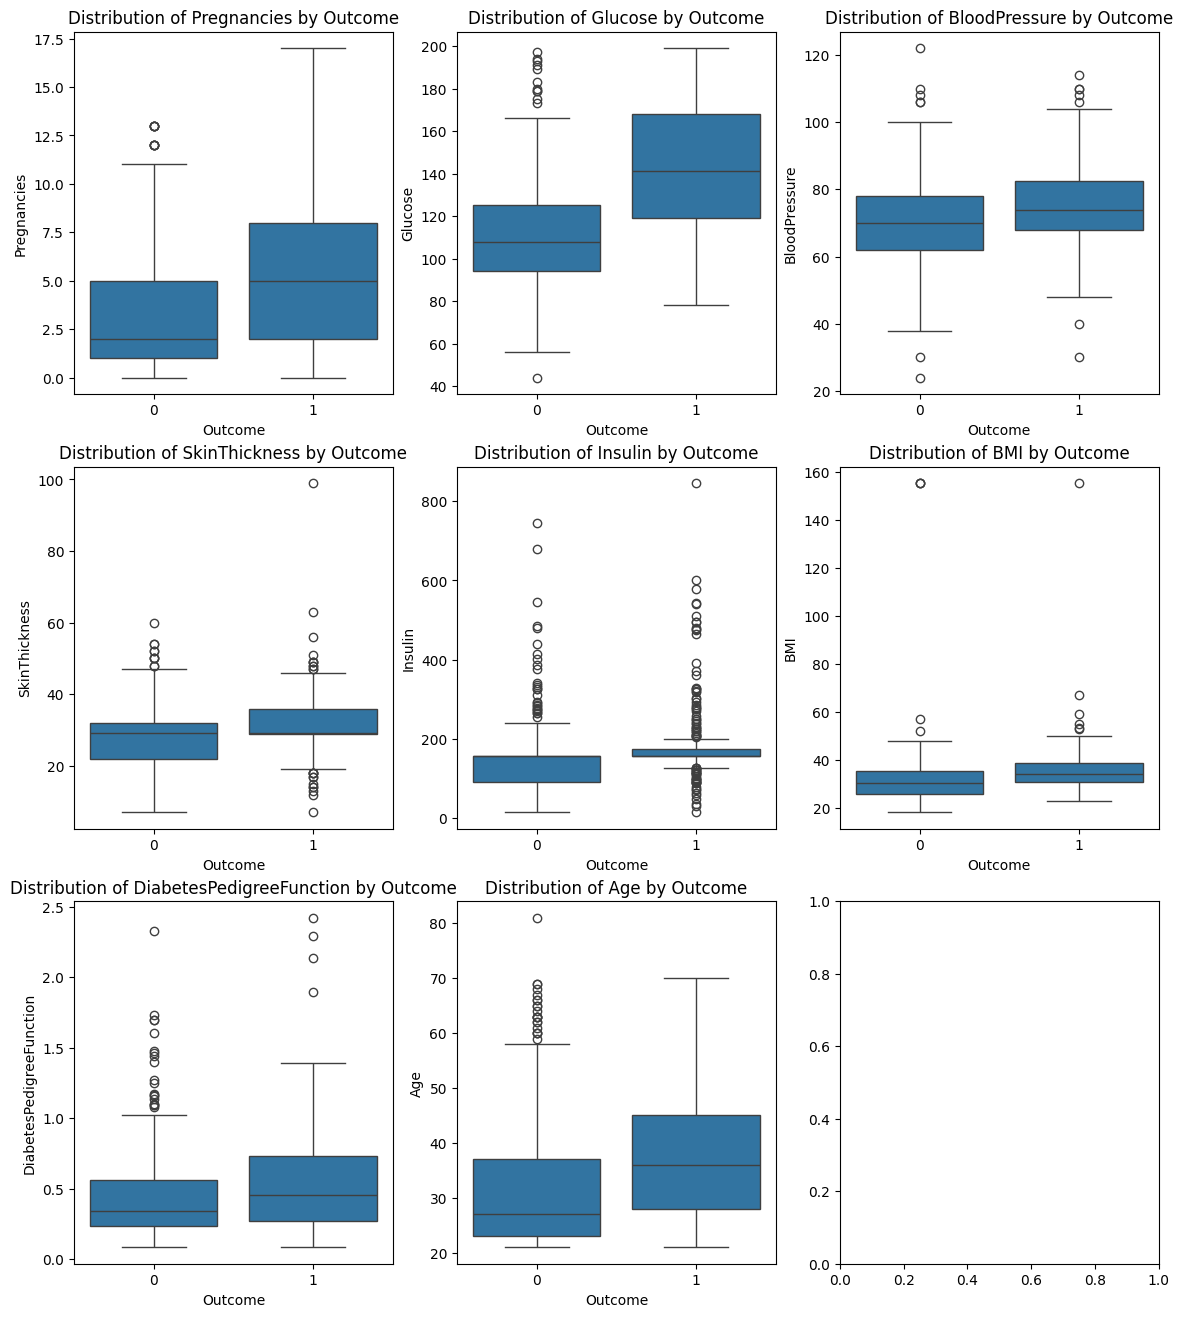

In [ ]:
# Create boxplot for all predictor features vs target variable

fig, axes = plt.subplots(3, 3, figsize=(14, 16))
axes = axes.flatten()

for i, feature in enumerate(df.columns[:-1]):
    sns.boxplot(data=df, x='Outcome', y=feature, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature} by Outcome')
    axes[i].set_xlabel('Outcome')
    axes[i].set_ylabel(feature)

##### Observations from Bivariate analysis
1. Pregnancies
   - The median number of pregnancies for the group with diabetes is higher than for the group without. The entire box for the Outcome=1 group is shifted upwards.
   - A higher number of pregnancies is associated with a higher likelihood of having diabetes.
2. Glucose
   - The median glucose level for the Outcome=1 group is substantially higher. There is very little overlap between the two boxes; the 75th percentile for the non-diabetic group is roughly equal to the 25th percentile for the diabetic group.
   - Higher glucose levels are a clear and powerful indicator of the condition.
3. BloodPreasure
   - The median blood pressure is slightly higher for the Outcome=1 group, but the difference is minimal. The boxes themselves have a very large overlap.
   - Blood pressure, on its own, appears to be a weak predictor. While there's a slight trend, the distributions are too similar to be a strong differentiator.
4. SkinThickness
   - Similar to blood pressure, the median skin thickness is slightly higher for the Outcome=1 group, but the boxes almost completely overlap.
   - This is also a weak predictor. It does not effectively separate the two outcome groups.
5. Insulin
   - This is an interesting case. The medians for both groups are very similar. However, the interquartile range (the height of the box) and the number of high-value outliers are significantly greater for the Outcome=1 group.
   - While the "typical" patient may have similar insulin levels, the diabetic group has much higher variability and a tendency towards extremely high levels (hyperinsulinemia), which is a classic sign of insulin resistance. This makes it a potentially valuable, albeit complex, feature.
6. BMI
   - There is a clear and significant difference between the two groups. The median BMI for the Outcome=1 group is visibly higher, and its entire box is shifted upwards compared to the Outcome=0 group.
   - BMI is a strong predictor. A higher BMI is clearly associated with a greater likelihood of having diabetes.
7. DiabetesPedigreeFunction
   - The median for the Outcome=1 group is higher, indicating a shift in the distribution.
   - A higher genetic risk score is associated with having diabetes.
8. Age
   - The median age of the diabetic group is noticeably higher than the non-diabetic group. The box for Outcome=1 is clearly shifted to the right.
   - Age is a strong predictor. Older individuals in this dataset are more likely to have diabetes.

#### Analysing Predictor Feature vs. Predictor Feature

This analysis is crucial for understanding relationships between your input variables. Strong correlations can be a sign of multicollinearity, where two variables provide redundant information.

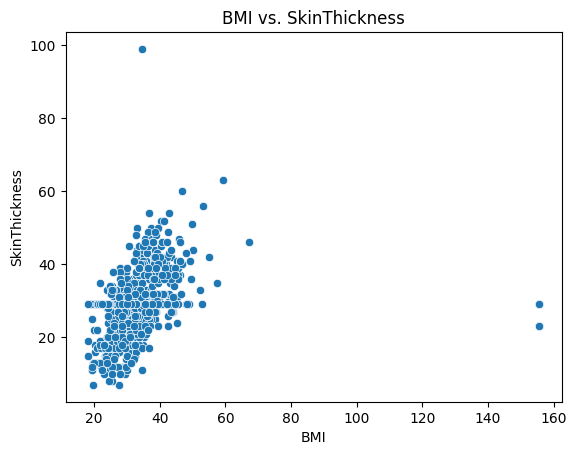

In [ ]:
# Create a scatter plot for BMI vs. SkinThickness

sns.scatterplot(data=df, x='BMI', y='SkinThickness')
plt.title('BMI vs. SkinThickness')
plt.show()

Observations
- The most immediate observation is a clear positive correlation between BMI and SkinThickness.
- This relationship is logical and expected. Both BMI and triceps skin fold thickness are measures used to estimate a person's body fat. It makes sense that they would increase together. This finding helps validate the quality and internal consistency of the dataset.

Outliers
- There is a point with a SkinThickness of nearly 100, which is exceptionally high compared to the corresponding BMI.
- On the far right, there are two points with extremely high BMI values (around 155-160) but moderate SkinThickness. These seem highly suspect and could be data entry errors.

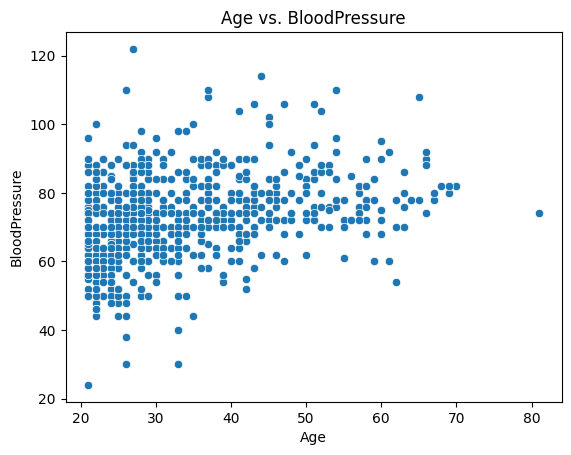

In [ ]:
# Creae a scatter plot for Age vs. BloodPressure

sns.scatterplot(data=df, x='Age', y='BloodPressure')
plt.title('Age vs. BloodPressure')
plt.show()

Observations
- The most prominent observation is the lack of a clear, strong relationship between Age and BloodPressure. The data points form a widely dispersed cloud with no distinct linear pattern.
- There is a very weak positive correlation, if any. Knowing a patient's age in this dataset does not allow you to reliably predict their blood pressure. This suggests that for this specific population, other lifestyle or genetic factors are more influential on blood pressure than age is.

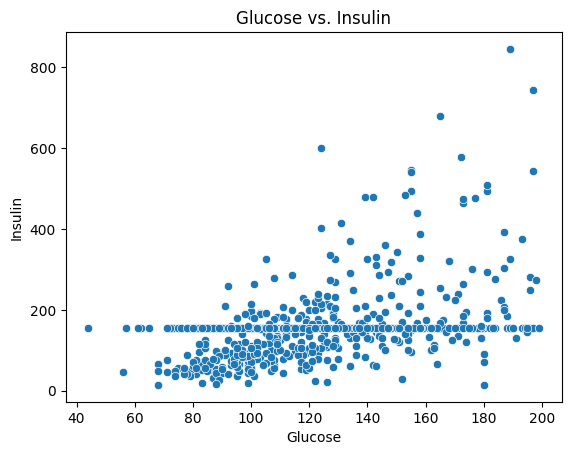

In [ ]:
# Create a scatter plot for Glucose vs. Insulin

sns.scatterplot(data=df, x='Glucose', y='Insulin')
plt.title('Glucose vs. Insulin')
plt.show()

Observations
- There is a weak positive correlation. As glucose levels increase, there is a general tendency for insulin levels to increase as well. However, the relationship is very noisy and not strongly linear.
- At lower glucose levels (e.g., < 100), insulin values are tightly clustered near the bottom. As glucose levels rise, the spread of insulin values becomes much larger. This is clinically significant: it reflects the diverse metabolic responses in the population. Some individuals with high glucose have low insulin (indicating pancreas fatigue), while others have extremely high insulin (indicating severe insulin resistance).

#### Analysing correlation of all features

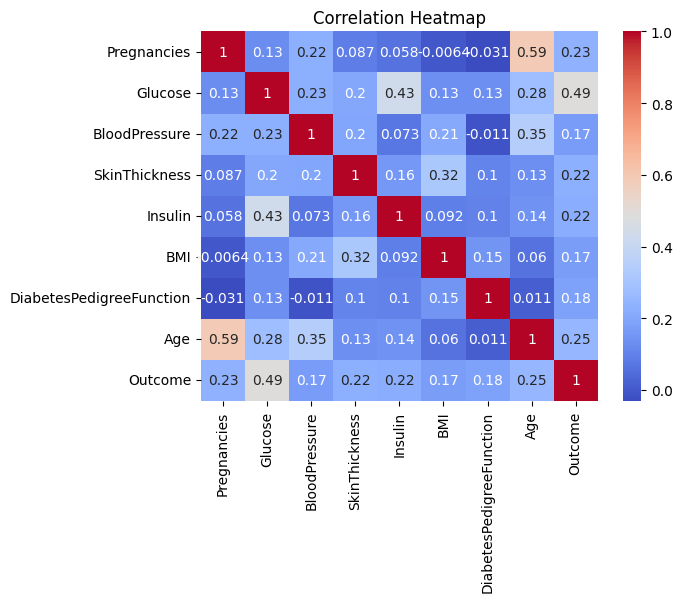

In [ ]:
# Create a correlation heatmap of all features

corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#### Observations from correlation matrix

##### Correlation with the Target Variable (Outcome)

This is the most critical analysis for your predictive modeling goal. By looking at the Outcome column, we can rank the features by their predictive power.
- **Strongest Predictor**: **Glucose** has the highest correlation with Outcome at 0.49. This confirms it's the most influential single feature for predicting diabetes.
- **Moderate Predictors**: **BMI** (0.29), **Age** (0.25), and **Pregnancies** (0.23) show moderate positive correlations. These are clearly important secondary features.
- **Weak Predictors**: **SkinThickness**, **Insulin**, **BloodPressure**, and DiabetesPedigreeFunction all have weaker correlations with the outcome (< 0.2). While they may still contribute to a model, their individual linear relationship with the outcome is not as strong.

##### Correlation Between Predictor Features (Multicollinearity)

This analysis helps identify redundant features. The most significant relationships are:
- **Age vs. Pregnancies**: These two have a correlation of 0.59, the strongest in the matrix (excluding the diagonal). This makes sense, as older women have had more time for pregnancies. This represents a moderate multicollinearity issue that you might need to address for certain models.
- **Glucose vs. Insulin**: A correlation of 0.43 confirms the positive relationship in the scatter plot.
- **BMI vs. SkinThickness**: The correlation is 0.32. While the scatter plot showed a clear trend, this numeric value confirms the relationship is positive but not extremely strong.